In [1]:
!sed -i 's/hadoop.root.logger=INFO,console/hadoop.root.logger=WARN,console/' /usr/hadoop-3.3.2/etc/hadoop/log4j.properties

In [2]:
# initialize Spark

import plotly
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql import SparkSession, Row
from pyspark.sql.functions import *
import pyspark.sql.functions as F

import os

conf = pyspark.SparkConf().setAll([('spark.master', 'local[2]'),
                                   ('spark.app.name', 'PySpark DataFrame Demo')])
spark = SparkSession.builder.config(conf=conf).getOrCreate()

print (spark.version, pyspark.version.__version__)

2023-04-26 04:36:06,915 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2023-04-26 04:36:08,600 WARN util.Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


3.3.1 3.3.1


In [3]:
df = spark.read.csv('file:///home/work/project/mas-dse-230/Crimes_-_2001_to_Present.csv', header=True)

In [4]:
df.select([count(when(col(c).isNotNull(), c)).alias(c) for c in df.columns]).show()

2023-04-26 04:36:21,652 WARN util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-----------+-------+-------+-------+------------+-----------+--------------------+-------+--------+-------+--------+-------+--------------+--------+------------+------------+-------+----------+--------+---------+--------+--------------------------+---------+---------------+-------------+-------+----------------------+----------------+------------+
|     ID|Case Number|   Date|  Block|   IUCR|Primary Type|Description|Location Description| Arrest|Domestic|   Beat|District|   Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|   Year|Updated On|Latitude|Longitude|Location|Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|  Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|
+-------+-----------+-------+-------+-------+------------+-----------+--------------------+-------+--------+-------+--------+-------+--------------+--------+------------+------------+-------+----------+--------+---------+--------+--------------------------+---------+---------------

In [5]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Historical Wards 2003-2015: string (nullable = true)
 |-- Zip Codes: string (nullable = true)
 |-- Com

In [6]:
df.count()

7776558

In [7]:
df.show(1)

+--------+-----------+--------------------+---------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+
|      ID|Case Number|                Date|          Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|
+--------+-----------+--------------------+---------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------

In [8]:
def value_count(column):
    return df.groupBy(column).count().orderBy('count', ascending=False)

In [9]:
desc_vals = value_count('Description')
desc_vals.collect()[:20]

[Row(Description='SIMPLE', count=912510),
 Row(Description='$500 AND UNDER', count=630523),
 Row(Description='DOMESTIC BATTERY SIMPLE', count=607936),
 Row(Description='TO VEHICLE', count=432175),
 Row(Description='OVER $500', count=413983),
 Row(Description='TO PROPERTY', count=409800),
 Row(Description='AUTOMOBILE', count=296849),
 Row(Description='FORCIBLE ENTRY', count=284088),
 Row(Description='POSS: CANNABIS 30GMS OR LESS', count=278139),
 Row(Description='FROM BUILDING', count=254466),
 Row(Description='RETAIL THEFT', count=203119),
 Row(Description='TELEPHONE THREAT', count=149926),
 Row(Description='TO LAND', count=131580),
 Row(Description='POSS: CRACK', count=121112),
 Row(Description='UNLAWFUL ENTRY', count=115222),
 Row(Description='HARASSMENT BY TELEPHONE', count=111073),
 Row(Description='AGGRAVATED: OTHER DANG WEAPON', count=96738),
 Row(Description='POSS: HEROIN(WHITE)', count=95786),
 Row(Description='ARMED: HANDGUN', count=93526),
 Row(Description='STRONGARM - NO WEA

In [10]:
df.filter(df.Description == 'SIMPLE').groupBy('Primary Type').count().show()

+------------+------+
|Primary Type| count|
+------------+------+
|    STALKING|  3802|
|     ASSAULT|347200|
|     BATTERY|561508|
+------------+------+



In [11]:
df.filter(df.Description == '$500 AND UNDER').groupBy('Primary Type').count().show()

+------------+------+
|Primary Type| count|
+------------+------+
|       THEFT|630523|
+------------+------+



In [12]:
df.filter(df.Description == 'DOMESTIC BATTERY SIMPLE').groupBy('Primary Type').count().show()

+------------+------+
|Primary Type| count|
+------------+------+
|     BATTERY|607936|
+------------+------+



In [13]:
df.filter(df.Description == 'TO VEHICLE').groupBy('Primary Type').count().show()

+-----------------+------+
|     Primary Type| count|
+-----------------+------+
|CRIMINAL TRESPASS| 14881|
|  CRIMINAL DAMAGE|417294|
+-----------------+------+



In [14]:
df.filter(df.Description == 'OVER $500').groupBy('Primary Type').count().show()

+------------+------+
|Primary Type| count|
+------------+------+
|       THEFT|413983|
+------------+------+



In [15]:
loc_desc_vals = value_count('Location Description')
loc_desc_vals.collect()[:20]

[Row(Location Description='STREET', count=2024554),
 Row(Location Description='RESIDENCE', count=1304828),
 Row(Location Description='APARTMENT', count=877834),
 Row(Location Description='SIDEWALK', count=728510),
 Row(Location Description='OTHER', count=270027),
 Row(Location Description='PARKING LOT/GARAGE(NON.RESID.)', count=202992),
 Row(Location Description='ALLEY', count=172650),
 Row(Location Description='SMALL RETAIL STORE', count=146948),
 Row(Location Description='SCHOOL, PUBLIC, BUILDING', count=146387),
 Row(Location Description='RESIDENCE-GARAGE', count=135543),
 Row(Location Description='RESTAURANT', count=127094),
 Row(Location Description='RESIDENCE PORCH/HALLWAY', count=124211),
 Row(Location Description='VEHICLE NON-COMMERCIAL', count=123917),
 Row(Location Description='GROCERY FOOD STORE', count=98629),
 Row(Location Description='DEPARTMENT STORE', count=98474),
 Row(Location Description='GAS STATION', count=86389),
 Row(Location Description='RESIDENTIAL YARD (FRONT/

Text(0.5, 1.0, 'Description Counts')

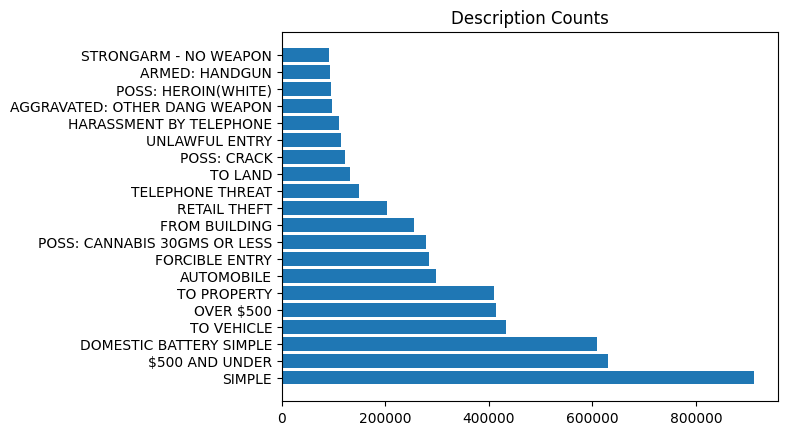

In [16]:
plt.barh([row['Description'] for row in desc_vals.collect()[:20]], [row['count'] for row in desc_vals.collect()[:20]])
plt.title('Description Counts')

In [17]:
prim_type = value_count('Primary Type')

Text(0.5, 1.0, 'Primary Type')

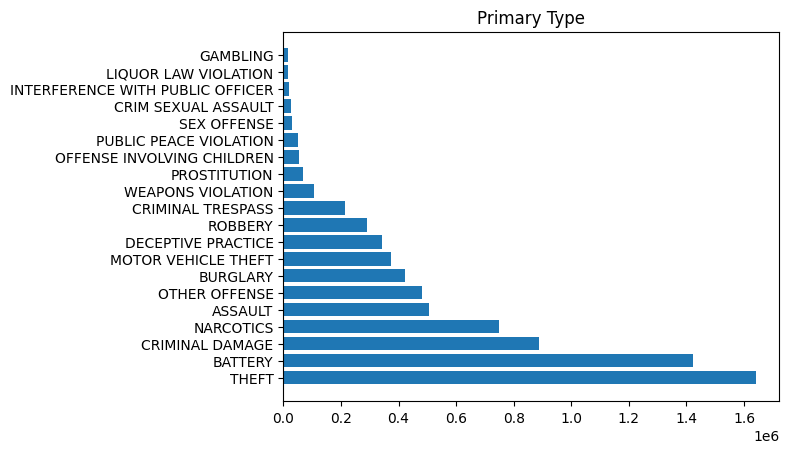

In [18]:
plt.barh([row['Primary Type'] for row in prim_type.collect()[:20]], [row['count'] for row in prim_type.collect()[:20]])
plt.title('Primary Type')

Text(0.5, 1.0, 'Primary Type')

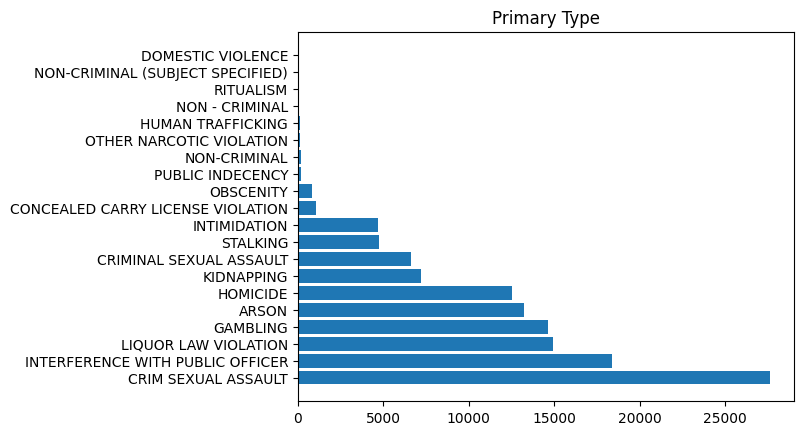

In [19]:
plt.barh([row['Primary Type'] for row in prim_type.collect()[-20:]], [row['count'] for row in prim_type.collect()[-20:]])
plt.title('Primary Type')

In [20]:
yearCounts = df.filter(df.Year < 2023).groupBy('Year').count().orderBy('Year').toPandas()

Text(0.5, 1.0, 'Crimes per Year')

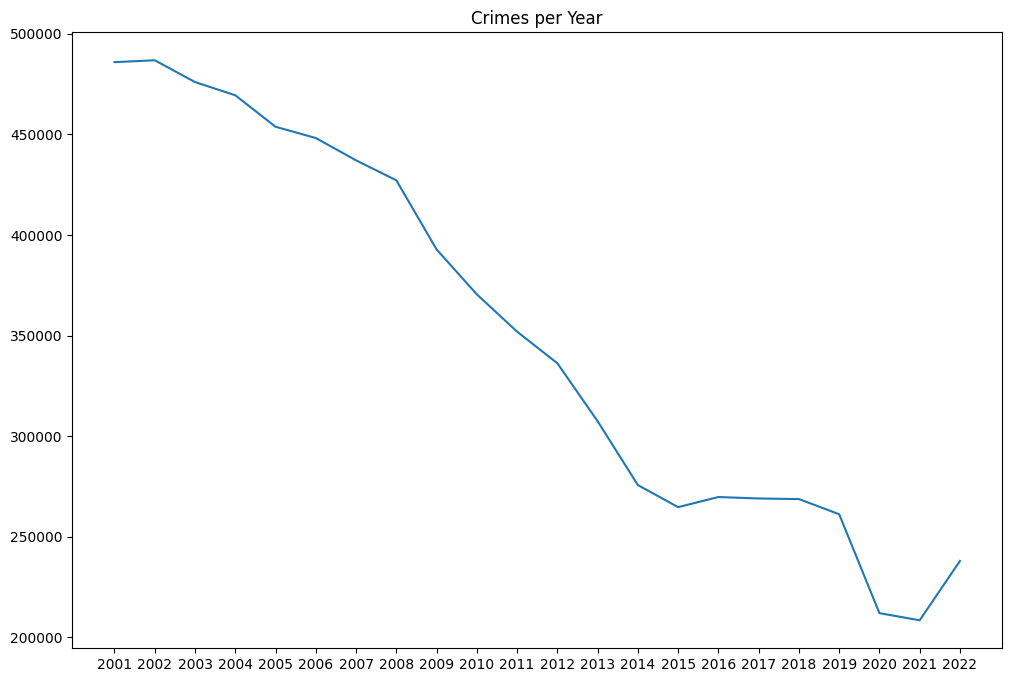

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(yearCounts['Year'], yearCounts['count'])
plt.title('Crimes per Year')